In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras import Input
# from keras.layers import Embedding
from keras.layers import Flatten, Dense, Embedding
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import model_selection

## 11.1 Data Preparation

In [2]:
# Read data from 2 files:
df_R = pd.read_csv("ratings.csv")
df_M = pd.read_csv("movies.csv")

In [3]:
df_R

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [4]:
df_M

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
#Join dataframe rating and movie
df = df_R.merge(df_M)
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [6]:
#Preapare Train, validation data
seed = 26
df_train, df_test = model_selection.train_test_split(df,test_size = 0.3, random_state=seed, stratify=df['rating'])
#using option stratify=df.rating

In [7]:
# Re-numbering userId ( to eliminate skipping id)
userId_list = df['userId'].unique()
userId_list

array([    1,     3,     4, ..., 18247, 16557,  6597], dtype=int64)

In [8]:
Index = 0
dict_users = {}

for ids in sorted(userId_list):
    dict_users[ids] = Index
    Index += 1

In [9]:
dict_users

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [10]:
# Re-numbering movieId
movieId_list = df['movieId'].unique()
movieId_list


array([   296,    306,    307, ..., 139970, 200726, 200728], dtype=int64)

In [11]:
Index_m = 0
dict_movie = {}

for ids in sorted(movieId_list):
    dict_movie[ids] = Index_m
    Index_m += 1

In [12]:
dict_movie

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 92: 90,
 93: 91,
 94: 92,
 95: 93,
 96: 94,
 97: 95,
 98: 96,
 99: 97,
 100: 98,
 101: 99,
 102: 100,
 103: 101,
 104: 102,
 105: 103,
 106: 104,
 107: 105,
 108: 106,
 109: 107,
 110: 108,
 111: 109,
 112: 1

In [13]:
df_train

,userId,movieId,rating,timestamp,title,genres
15261046,56310,6942,3.0,1562726485,Love Actually (2003),Comedy|Drama|Romance
3378301,55716,4963,2.5,1185002255,Ocean's Eleven (2001),Crime|Thriller
17763396,84611,3081,4.0,1259249871,Sleepy Hollow (1999),Fantasy|Horror|Mystery|Romance
1870505,6936,1210,4.0,1167996741,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
8603100,98219,106920,4.5,1440795386,Her (2013),Drama|Romance|Sci-Fi
...,...,...,...,...,...,...
11882750,18484,1597,4.0,1146251744,Conspiracy Theory (1997),Drama|Mystery|Romance|Thriller
5038511,58987,2628,1.5,1090877549,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
20632465,65222,142488,2.0,1447942823,Spotlight (2015),Thriller
10277524,7426,595,4.0,843068862,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX


In [14]:
#Map new id to train, validation for both “userId”, “movieId”
df_train["userId"] = df_train["userId"].map(dict_users)
df_train["movieId"] = df_train["movieId"].map(dict_movie)
df_train

,userId,movieId,rating,timestamp,title,genres
15261046,56309,6817,3.0,1562726485,Love Actually (2003),Comedy|Drama|Romance
3378301,55715,4857,2.5,1185002255,Ocean's Eleven (2001),Crime|Thriller
17763396,84610,2988,4.0,1259249871,Sleepy Hollow (1999),Fantasy|Horror|Mystery|Romance
1870505,6935,1179,4.0,1167996741,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
8603100,98218,20607,4.5,1440795386,Her (2013),Drama|Romance|Sci-Fi
...,...,...,...,...,...,...
11882750,18483,1540,4.0,1146251744,Conspiracy Theory (1997),Drama|Mystery|Romance|Thriller
5038511,58986,2537,1.5,1090877549,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
20632465,65221,31770,2.0,1447942823,Spotlight (2015),Thriller
10277524,7425,587,4.0,843068862,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX


In [15]:
df_test

,userId,movieId,rating,timestamp,title,genres
15819911,39251,5881,4.0,1039217570,Solaris (2002),Drama|Romance|Sci-Fi
7788474,110560,69640,4.5,1558431553,Public Enemies (2009),Crime|Drama|Thriller
12314671,3868,539,4.0,1242719086,Sleepless in Seattle (1993),Comedy|Drama|Romance
18616279,81215,45728,3.0,1236392174,Clerks II (2006),Comedy
9135008,74567,1265,3.0,1109788134,Groundhog Day (1993),Comedy|Fantasy|Romance
...,...,...,...,...,...,...
12863037,17807,1372,3.5,1075722261,Star Trek VI: The Undiscovered Country (1991),Action|Mystery|Sci-Fi
24742158,65758,175505,2.5,1540065416,The Saint (2017),Action|Adventure|Crime
3325628,88186,4886,5.0,1051813588,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
1657644,127966,1080,4.0,965870560,Monty Python's Life of Brian (1979),Comedy


In [16]:
df_test["userId"] = df_test["userId"].map(dict_users)
df_test["movieId"] = df_test["movieId"].map(dict_movie)
df_test

,userId,movieId,rating,timestamp,title,genres
15819911,39250,5769,4.0,1039217570,Solaris (2002),Drama|Romance|Sci-Fi
7788474,110559,13468,4.5,1558431553,Public Enemies (2009),Crime|Drama|Thriller
12314671,3867,534,4.0,1242719086,Sleepless in Seattle (1993),Comedy|Drama|Romance
18616279,81214,10836,3.0,1236392174,Clerks II (2006),Comedy
9135008,74566,1232,3.0,1109788134,Groundhog Day (1993),Comedy|Fantasy|Romance
...,...,...,...,...,...,...
12863037,17806,1336,3.5,1075722261,Star Trek VI: The Undiscovered Country (1991),Action|Mystery|Sci-Fi
24742158,65757,45019,2.5,1540065416,The Saint (2017),Action|Adventure|Crime
3325628,88185,4780,5.0,1051813588,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
1657644,127965,1053,4.0,965870560,Monty Python's Life of Brian (1979),Comedy


## 11.2 Model Preparation and Training

In [17]:
# Create Model NCF
EMBEDDING_SIZE = 100
users_input = Input(shape=(1,), name="users_input")
users_embedding = Embedding(len(userId_list) + 1, EMBEDDING_SIZE,name="users_embeddings")(users_input)
users_bias = Embedding(len(userId_list) + 1, 1, name="users_bias")(users_input)

In [18]:
movies_input = Input(shape=(1,), name="movies_input")
movies_embedding = Embedding(len(movieId_list) + 1, EMBEDDING_SIZE,name="movies_embeddings")(movies_input)
movies_bias = Embedding(len(movieId_list) + 1, 1, name="movies_bias")(movies_input)

In [19]:
dot_product_users_movies = tf.math.multiply(users_embedding, movies_embedding)
input_terms = dot_product_users_movies + users_bias + movies_bias
input_terms = Flatten(name="fl_inputs")(input_terms)
output = Dense(1, activation="relu", name="output")(input_terms)
model = Model(inputs=[users_input, movies_input], outputs=output)

In [20]:
opt_adam = Adam(lr = 0.005)
model.compile(optimizer=opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [21]:
# ------------ View Model Summary -------------------------------
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 users_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 movies_input (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 users_embeddings (Embedding)   (None, 1, 100)       16254200    ['users_input[0][0]']            
                                                                                                  
 movies_embeddings (Embedding)  (None, 1, 100)       5904800     ['movies_input[0][0]']           
                                                                                              

In [22]:
# ------------ Training Model -------------------------------
BS = [64, 128, 256, 512, 1024, 2048] # try at least 3 values
EP = [5, 10, 20, 50, 60] # try at least 3 values
history = model.fit(

x=[df_train['userId'], df_train['movieId']],
y=df_train['rating'],
batch_size= 512,
epochs= 5,
verbose= 1,
validation_data=([df_test['userId'], df_test['movieId']], df_test['rating']))

Epoch 1/5
34180/34180 [==============================] - 4533s 133ms/step - loss: 0.7452 - mean_absolute_error: 0.6544 - val_loss: 0.6443 - val_mean_absolute_error: 0.6146
Epoch 2/5
34180/34180 [==============================] - 16637s 487ms/step - loss: 0.5320 - mean_absolute_error: 0.5502 - val_loss: 0.6776 - val_mean_absolute_error: 0.6400
Epoch 3/5
34180/34180 [==============================] - 4408s 129ms/step - loss: 0.4277 - mean_absolute_error: 0.4893 - val_loss: 0.6583 - val_mean_absolute_error: 0.6210
Epoch 4/5
34180/34180 [==============================] - 23941s 700ms/step - loss: 0.3742 - mean_absolute_error: 0.4550 - val_loss: 0.6785 - val_mean_absolute_error: 0.6247
Epoch 5/5
34180/34180 [==============================] - 4638s 136ms/step - loss: 0.3433 - mean_absolute_error: 0.4341 - val_loss: 0.7057 - val_mean_absolute_error: 0.6406


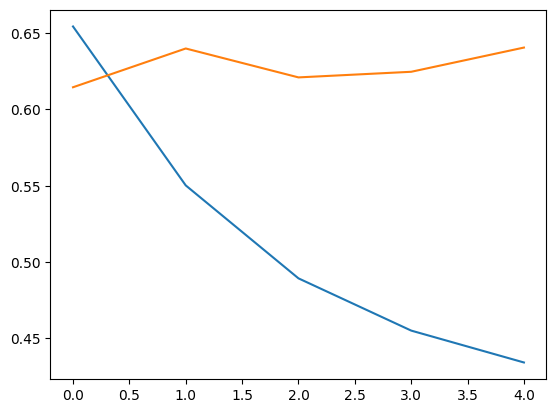

In [23]:
# ------------ Visualize loss -------------------------------
plt.plot(history.history["mean_absolute_error"]) #blue
plt.plot(history.history["val_mean_absolute_error"])

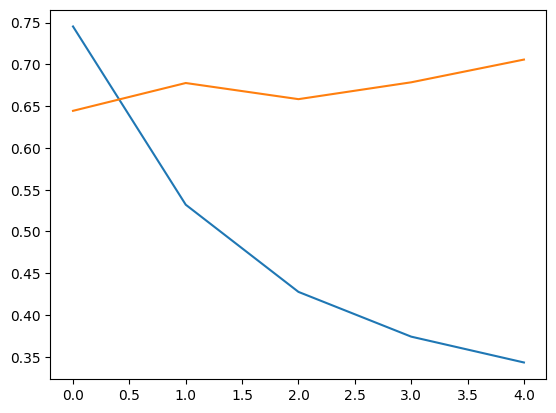

In [24]:
plt.plot(history.history["loss"]) #blue
plt.plot(history.history["val_loss"])

In [25]:
# ------------ Model Prediction -------------------------------
userPredictR = pd.DataFrame(model.predict([df_test['userId'], df_test['movieId']]))

234376/234376 [==============================] - 222s 945us/step


In [26]:
userPredictR

,0
0,4.049035
1,4.301205
2,3.985022
3,2.775913
4,3.209753
...,...
7500024,3.277296
7500025,2.338078
7500026,4.587501
7500027,3.426769
